# Idea 1
- We induce subgraph of proteins (or maybe subgraph of proteins + 1 degree of separation away)
- Find communities using MCL or Louvain to get us communities of size ~30
- Determine if these communities are functional
- Find bottlenecks/hub proteins of each complex
- This gives us relevant proteins for treatment or disrupting pathways

In [ ]:
import networkx as nx
import numpy as np
import scipy as sp
import pandas as pd

In [18]:
# Reading in graph 
G = nx.read_weighted_edgelist("yeast.txt",comments="#",nodetype=str)

Removing edges not meeting threshold score. **Need to decide what we are doing with essential nodes.**

In [19]:
# Deleting edges that don't meet threshold score
threshold_score = 700
for edge in G.edges: 
    weight = list(G.get_edge_data(edge[0],edge[1]).values())
    if(weight[0] <= threshold_score):
        G.remove_edge(edge[0],edge[1])

Relabelling nodes to get rid of 4932 tag

In [20]:
H = nx.relabel_nodes(G, lambda x: x[5:])

Getting list of all yeast homologs

In [21]:
df = pd.read_csv("human_to_yeast.csv")
homologs = list(set(list(df["homolog_systematic_name"])))

Getting subgraph induced by yeast homologs

In [23]:
H0 = H.subgraph(homologs).copy()

In [24]:
print(H0)

Graph with 783 nodes and 4518 edges


Louvain

In [35]:
louvain = nx.algorithms.community.louvain_communities(H0, resolution=7, seed=123)
louvain.sort(key=len, reverse=True)

print("Number of communities: {}".format(len(louvain)))
size_of_communities = [len(community) for community in louvain]
print("Sizes of communities: ", size_of_communities)

Number of communities: 102
Sizes of communities:  [31, 29, 27, 26, 23, 22, 22, 22, 21, 21, 20, 20, 20, 19, 19, 18, 18, 17, 17, 17, 16, 16, 15, 15, 15, 15, 14, 14, 14, 13, 12, 12, 12, 12, 11, 11, 10, 10, 9, 9, 8, 7, 7, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Drawing communities (taking the four biggest communities)

In [57]:
import matplotlib.pyplot as plt
from netgraph import Graph
import random

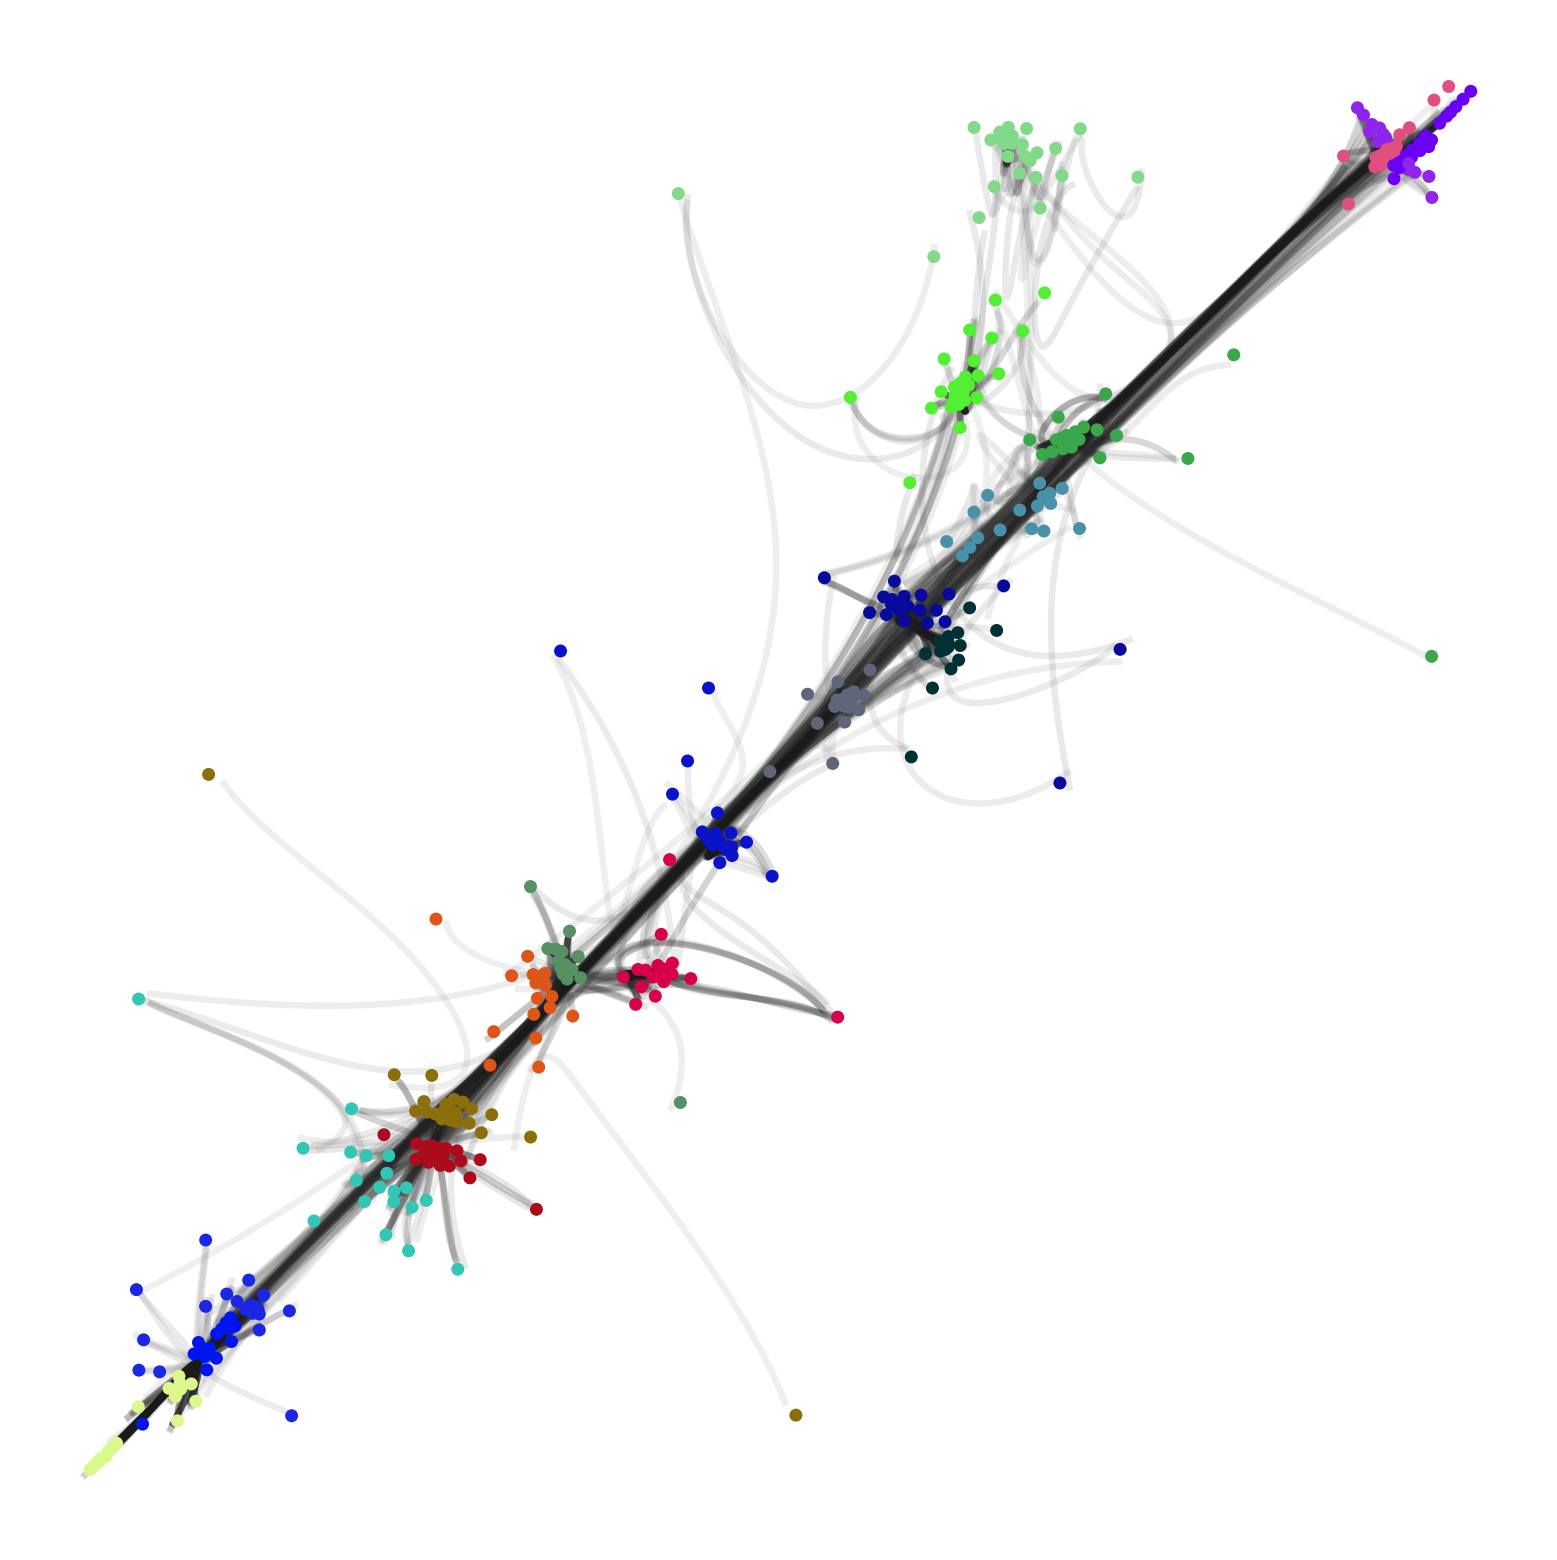

In [80]:
# parameter that controls how many communities we are interested in
t = 20

nodes = []

for i in range(t):
  nodes.extend(louvain[i]) 


# Subgraph induced by these communities
H1 = H0.subgraph(nodes).copy()

node_to_community = {}

for i in range(t):
  for node in louvain[i]:
    node_to_community[node] = i

# Making colour map for all of our important communities, making the other smaller ones black
community_to_color = dict([(i, "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])) for i in range(t)])

node_color = {node: community_to_color[community_id] for node, community_id in node_to_community.items()}


plt.figure(figsize=(20,20))
Graph(H1,
      node_color=node_color, node_edge_width=0, edge_alpha=0.1, node_size = 0.5, edge_width = 0.5,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000)
)

plt.show()

## Centrality

Degree Centrality

In [81]:
hub = {}
for index, community in enumerate(louvain):
  sub = H0.subgraph(community).copy()
  d = sorted(list(nx.algorithms.centrality.degree_centrality(sub).items()), key=lambda x: x[1], reverse=True)
  hub[index] = d[0]

print(hub)

{0: ('YMR105C', 0.6666666666666666), 1: ('YFL038C', 0.6785714285714285), 2: ('YER069W', 0.3076923076923077), 3: ('YBL016W', 0.52), 4: ('YGL206C', 0.5454545454545454), 5: ('YER125W', 0.5714285714285714), 6: ('YBR247C', 0.9047619047619047), 7: ('YJL034W', 1.0), 8: ('YIL061C', 0.8), 9: ('YKL145W', 1.0), 10: ('YLR229C', 0.7368421052631579), 11: ('YJL063C', 0.7368421052631579), 12: ('YPR023C', 0.631578947368421), 13: ('YHR143W-A', 0.7222222222222222), 14: ('YDR091C', 0.5555555555555556), 15: ('YDL192W', 0.7647058823529411), 16: ('YML032C', 0.8235294117647058), 17: ('YMR165C', 0.375), 18: ('YML001W', 0.8125), 19: ('YPL252C', 0.375), 20: ('YPR183W', 0.4666666666666667), 21: ('YOL133W', 0.9333333333333333), 22: ('YDL029W', 1.0), 23: ('YLR293C', 0.7142857142857142), 24: ('YEL039C', 0.5), 25: ('YLR378C', 0.6428571428571428), 26: ('YDR225W', 0.8461538461538463), 27: ('YNL135C', 0.6153846153846154), 28: ('YGR019W', 0.6153846153846154), 29: ('YLR043C', 0.6666666666666666), 30: ('YCR027C', 0.7272727

Eigenvector Centrality

In [84]:
hub = {}
for index, community in enumerate(louvain):
  sub = H0.subgraph(community).copy()
  d = sorted(list(nx.algorithms.centrality.eigenvector_centrality(sub).items()), key=lambda x: x[1], reverse=True)
  hub[index] = d[0]

print(hub)

{0: ('YLR354C', 0.2839281537851326), 1: ('YLR268W', 0.30251920012500544), 2: ('YER069W', 0.43345505699223236), 3: ('YBL016W', 0.37141282320340785), 4: ('YGL206C', 0.3381241770127732), 5: ('YER125W', 0.4204107274072085), 6: ('YBR247C', 0.2977551805211078), 7: ('YJL034W', 0.27529169834208306), 8: ('YIL061C', 0.29236104388876016), 9: ('YKL145W', 0.23132194958651595), 10: ('YLR229C', 0.36277687957597815), 11: ('YJL063C', 0.2834789004687788), 12: ('YPR023C', 0.31704747758117313), 13: ('YHR143W-A', 0.36864622954073195), 14: ('YHR020W', 0.3802188201662318), 15: ('YDL192W', 0.4197327526604727), 16: ('YML032C', 0.36471233935316355), 17: ('YOR245C', 0.46132868373932007), 18: ('YML001W', 0.38394965451807694), 19: ('YPL252C', 0.5015495619277769), 20: ('YPR183W', 0.49475762401354373), 21: ('YOL133W', 0.3813739430907457), 22: ('YDL029W', 0.3421466888413477), 23: ('YLR293C', 0.40332726746317143), 24: ('YJR048W', 0.43456760220444013), 25: ('YLR378C', 0.5059871539349884), 26: ('YDR225W', 0.373803438582

Betweenness Centrality

In [85]:
hub = {}
for index, community in enumerate(louvain):
  sub = H0.subgraph(community).copy()
  d = sorted(list(nx.algorithms.centrality.betweenness_centrality(sub).items()), key=lambda x: x[1], reverse=True)
  hub[index] = d[0]

print(hub)

{0: ('YMR105C', 0.26813348109173885), 1: ('YFL038C', 0.12381180388596807), 2: ('YGL202W', 0.5008205128205129), 3: ('YBL016W', 0.346244708994709), 4: ('YNL106C', 0.2702767018556492), 5: ('YCL008C', 0.3475396825396826), 6: ('YJL069C', 0.1565551776266062), 7: ('YJL034W', 0.10640812890812892), 8: ('YBR257W', 0.09999999999999999), 9: ('YKL145W', 0.018224728487886387), 10: ('YHR023W', 0.14262972245428382), 11: ('YLL013C', 0.25891116680590365), 12: ('YPL235W', 0.13352766381390574), 13: ('YHR143W-A', 0.23686944863415454), 14: ('YDR091C', 0.2786336756924992), 15: ('YDL192W', 0.24296218487394958), 16: ('YML032C', 0.12700438018344595), 17: ('YMR165C', 0.5791666666666666), 18: ('YML001W', 0.2597204184704185), 19: ('YMR110C', 0.575), 20: ('YPR183W', 0.526984126984127), 21: ('YOL133W', 0.14650793650793653), 22: ('YDL029W', 0.09104308390022677), 23: ('YDR510W', 0.27930402930402937), 24: ('YEL039C', 0.3003663003663004), 25: ('YLR378C', 0.5516483516483517), 26: ('YJL168C', 0.2058678500986193), 27: ('YN

VoteRank

In [87]:
print(nx.algorithms.centrality.voterank(H0, 10))

['YFL039C', 'YBR160W', 'YFL005W', 'YNL031C', 'YDL126C', 'YPL240C', 'YJL034W', 'YBR010W', 'YLR229C', 'YJL194W']
